In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

* 트레이닝 데이터(train.csv)는 1460개의 데이터(객체)를 가지고 있음. 데이터를 설명하는 변수는 81개인데, 이 중 36개는 정량적(quantitative)인 변수고, 43개는 정성적(categorical,qualitative)변수이며, 나머지 2개의 변수는 Id와 Salesprice임.
* 위 코드는 변수 중 Id와 SalePrice를 제외한 후, 정량적 변수와 정성적 변수로 구분하기 위한 코드임. 특정 변수의 데이터 타입이 Object 형이면, 이를 정성 변수라고 판단함.

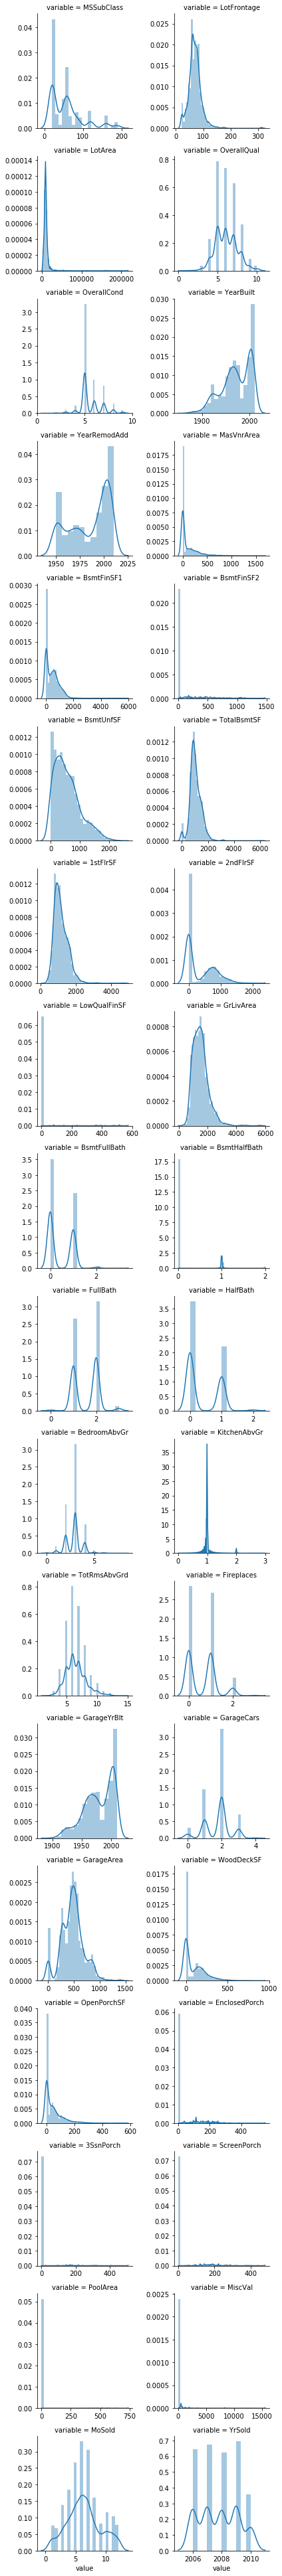

In [4]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

* 먼저 정량 변수 분포를 살펴봄. TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea의 분포를 보면 로그변환을 취해 분산이 일정(이른바 등분산성, 분포를 한 쪽에 치우지지 않은 종모양으로 만드는 것)하게 만들 수 있다는 것을 알 수 있다. 각 변수의 데이터가 등분산성을 갖는다면 회귀모델 등에서 좀 더 좋은 예측을 할 수 있다.
* 차후 우리 팀에서는 여러 변수들에 대해서 동분산성을 갖게끔 다양한 변환을 해볼 계획임

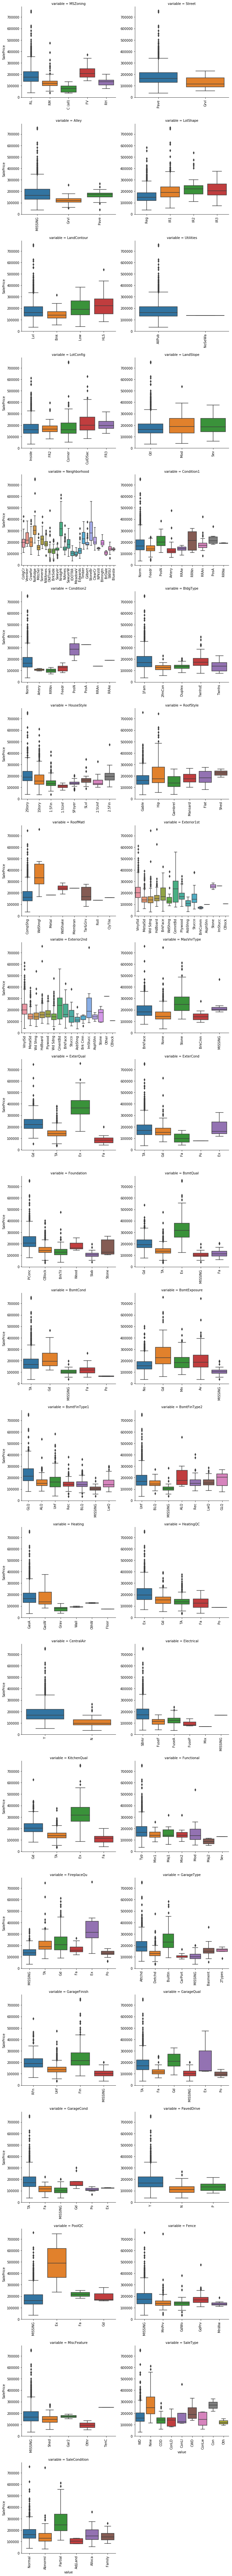

In [5]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

* Null 값을 MISSING 값으로 대체함. 
* 데이터에서 Null 값은실제 해당 변수값을 측정하지 못했다는 뜻이라기 보다, 이번 데이터셋에서는 변수에 관련된 항목이 부존재한다는 뜻임. 예컨데 Fence가 Null값이었던 경우 Fence가 있는지 없는지에 데이터가 누락되었다는 것이 아니라, Fence가 없다는 의미에서 Null을 넣은 것.   
* 정성 변수 분포와 Salesprice의 관계를 살펴봄. 수영장이 있는 집이 없는 집 보다 비싸다는 점, 이웃이 집 값에 영향을 크게 미치는 점 등을 알 수 있음. 정성 변수를 단순히 원핫인코딩이나 더미로 처리하는 것이 아닌. 각각의 정성 변수 값에 숫자를 대응시키는 방법을 고려해 볼 수있음. 예컨데  HeatingQC에서 Ex는 5(점), Gd는 4, TA는 3, Fa는 2, Po는 1 이런식으로 대응시키는 방법이 있음